

```
# Mathematical description of Linear regression
```

$d = \{(x_{i}, y_{i}): i = 1, 2, 3, \cdot, n\}$ \\
$y_{i} = m x_{i} + c$ \\
$y_{1} = m x_{1} + c$ \\
$y_{2} = m x_{2} + c$ \\
$\cdots$ \\
$y_{n} = m x_{n} + c$ \\
The above system of equations can be written as in matrix form as follows: \\
$\begin{bmatrix} y_{1} \\ y_{2} \\ \cdots \\ y_{n} \end{bmatrix} =
\begin{bmatrix}
	x_{1} & 1  \\
	x_{2} & 1  \\
  \cdots \\
	x_{n} & 1  \\
	\end{bmatrix} \times \begin{bmatrix} m \\ c \end{bmatrix}$

Where $\begin{bmatrix}
	x_{1} & 1  \\
	x_{2} & 1  \\
  \cdots \\
	x_{n} & 1  \\
	\end{bmatrix} = \mathbf{A}$,
$\begin{bmatrix} m \\ c \end{bmatrix} = \vec{w}$, and $\begin{bmatrix} y_{1} \\ y_{2} \\ \cdots \\ y_{n} \end{bmatrix} = \vec{y}$ \\

$\mathbf{A}_{n \times 2} \, \vec{w}_{2 \times 1} = \vec{y}_{n \times 1}$ \\
From the above relation, it is clear that we need to compute $\vec{w}$ from the given data i.e. $\mathbf{A}$ and $\vec{y}$. \\
The general solution of the above equation is: \\
$\vec{w} = \mathbf{A}^{-1} \, \vec{y}$, if $\mathbf{A}$ is a square matrix and $|A| \neq 0$. However, in general, the data matrix $\mathbf{A}$ is a non-square matrix. Therefore, we can't directly obtain the inverse of $\mathbf{A}$. We can rewrite the above equation as follows: \\
${\mathbf{A}^{T}}_{2 \times n} \, \mathbf{A}_{n \times 2} \, \vec{w}_{2 \times 1} = {\mathbf{A}^{T}}_{2 \times n} \, \vec{y}$. \\
$\vec{w} = (\mathbf{A}^{T} \mathbf{A})^{-1} \, \mathbf{A}^{T} \, \vec{y}$, where $|\mathbf{A}^{T} \mathbf{A}| \neq 0$.  



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
Area = np.array([2600, 3000, 3200, 3600, 4000]).reshape((-1, 1))
Price = np.array([550000, 565000, 610000, 680000, 725000])

In [29]:
print(Area)
print(Price)

[[2600]
 [3000]
 [3200]
 [3600]
 [4000]]
[550000 565000 610000 680000 725000]


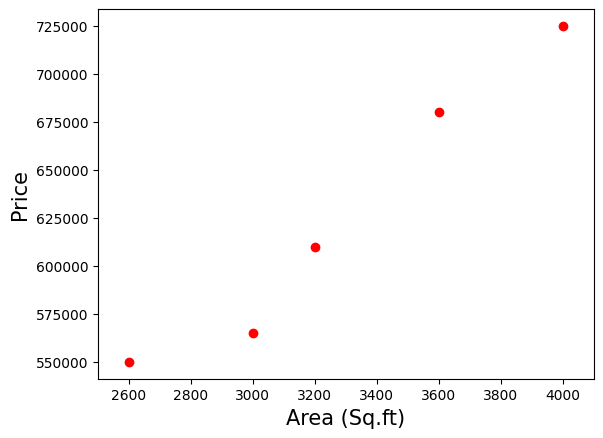

In [30]:
plt.plot(Area, Price, 'o', color = 'red')
plt.xlim(2500, 4100)
#plt.axvline(x = 3400, linestyle = '--', color = 'black', lw = 1)
#plt.axhline(y = 635000, linestyle = '--', color = 'black', lw = 1)
plt.xlabel('Area (Sq.ft)', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [31]:
A = np.zeros((len(Area), 2))

In [32]:
A.shape

(5, 2)

In [33]:
A[:, 0] = Area.flatten()
A[:, 1] = np.ones(len(Area))
print(A.shape)
print(A)

(5, 2)
[[2.6e+03 1.0e+00]
 [3.0e+03 1.0e+00]
 [3.2e+03 1.0e+00]
 [3.6e+03 1.0e+00]
 [4.0e+03 1.0e+00]]


In [34]:
B1 = np.dot(A.T, A)
print(B1.shape)

(2, 2)


In [35]:
print(linalg.det(B1))

5839999.999999979


In [36]:
B1_inv = linalg.inv(B1)
print(B1_inv.shape)
print(B1_inv)

(2, 2)
[[ 8.56164384e-07 -2.80821918e-03]
 [-2.80821918e-03  9.41095890e+00]]


In [37]:
B2 = np.dot(B1_inv, A.T)
print(B2.shape)
print(B2)

(2, 5)
[[-5.82191781e-04 -2.39726027e-04 -6.84931507e-05  2.73972603e-04
   6.16438356e-04]
 [ 2.10958904e+00  9.86301370e-01  4.24657534e-01 -6.98630137e-01
  -1.82191781e+00]]


In [38]:
sol1 = np.dot(B2, Price)
print(sol1)

[1.35787671e+02 1.80616438e+05]


In [39]:
A_pinv = linalg.pinv(A)
print(A_pinv.shape)
print(A_pinv)

(2, 5)
[[-5.82191781e-04 -2.39726027e-04 -6.84931507e-05  2.73972603e-04
   6.16438356e-04]
 [ 2.10958904e+00  9.86301370e-01  4.24657534e-01 -6.98630137e-01
  -1.82191781e+00]]


In [40]:
sol2 = np.dot(A_pinv, Price)
print(sol1, sol2)

[1.35787671e+02 1.80616438e+05] [1.35787671e+02 1.80616438e+05]


In [41]:
slope = sol1[0]
intercept = sol1[1]

In [42]:
y_pred1 = slope* Area + intercept

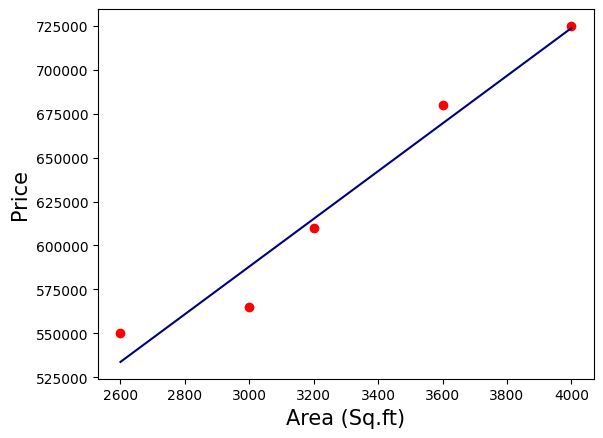

In [43]:
plt.plot(Area, Price, 'o', color = 'red')
plt.plot(Area, y_pred1, '-', color = 'navy')
#plt.axvline(x = 3400, linestyle = '--', color = 'black', lw = 1)
#plt.axhline(y = 645000, linestyle = '--', color = 'black', lw = 1)
plt.xlabel('Area (Sq.ft)', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [44]:
# model evaluation
rmse1 = mean_squared_error(Price, y_pred1)
r2_1 = r2_score(Price, y_pred1)
print(rmse1, r2_1)

186815068.49315006 0.9584301138199488


''' Using Sklearn'''

In [45]:
model = LinearRegression().fit(Area, Price)

''' $R^{2}$ score: '' \\

$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}$

The total sum of squares: $SS_{tot} = \sum_{i}({y_{i} - \bar{y}})^{2}$ \\
The residual sum of squares: $SS_{res} = \sum_{i}(y_{i} - \hat{y}_{i} )^{2} = \sum_{i}(Residual)^{2}$ \\
If $\bar{y}$ is the mean of the observed data: $\bar{y} = \frac{1}{n}\sum_{i = 1}^{n}{y_{i}}$ \\

In [46]:
r_sq = model.score(Area, Price)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9584301138199486


In [47]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 180616.43835616432
slope: [135.78767123]


In [48]:
y_pred2 = model.predict(Area)

In [49]:
# model evaluation
rmse2 = mean_squared_error(Price, y_pred2)
r2_2 = r2_score(Price, y_pred2)
print(rmse2, r2_2)

186815068.4931509 0.9584301138199486


In [50]:
y_pred3 = model.intercept_ + model.coef_ * Area
print('predicted response:', y_pred3, sep = '\n')

predicted response:
[[533664.38356164]
 [587979.45205479]
 [615136.98630137]
 [669452.05479452]
 [723767.12328767]]


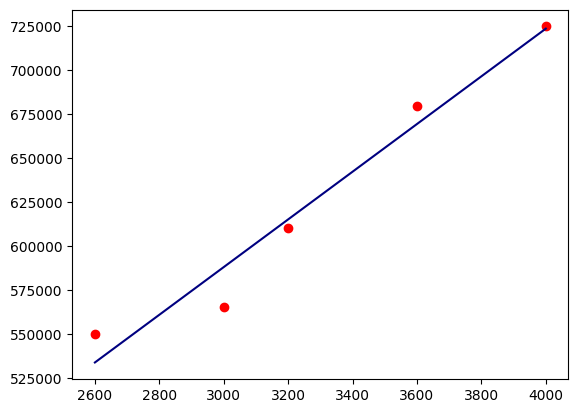

In [51]:
plt.plot(Area, Price, 'o', color = 'red')
plt.plot(Area, y_pred2, '-', color = 'navy')
plt.show()